In [26]:
import pandas as pd

In [27]:
df_boston= pd.read_csv('Boston House Prices.csv')

In [28]:
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


# Linear Regression with Statsmodels

In [29]:
import statsmodels.api as sm

## Simple Linear Regression

In [30]:
# Define the dependent (what we want to predict) and independent Variable
y = df_boston['Value'] # dependent variable
x = df_boston['Rooms'] # independent variable

<Axes: xlabel='Rooms', ylabel='Value'>

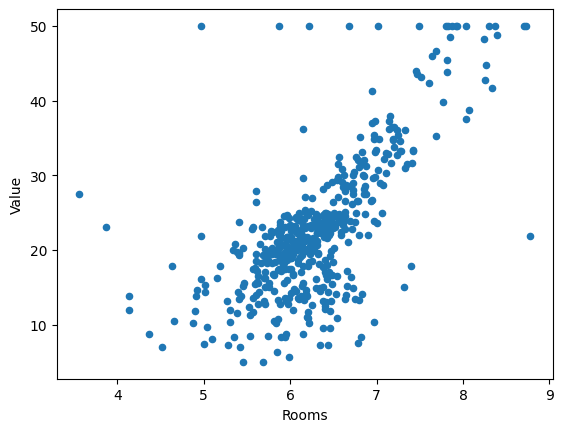

In [31]:
# Exploring the dataset (how data is distributed)
df_boston.plot(kind='scatter',
               x='Rooms',
               y='Value')

## Making the regression : Adding a constant and fitting the model

In [32]:
x = sm.add_constant(x)
linear_model = sm.OLS(y,x).fit() ## fitting the model for accurate results

In [33]:
linear_model.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

### Regression Table

In [34]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.49e-74
Time:                        17:43:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Equation

In [35]:
# Rooms coef: 9.1021
# Constant coef: - 34.6706

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 9.1021*x['Rooms'] - 34.6706

### Plotting the Regression Line

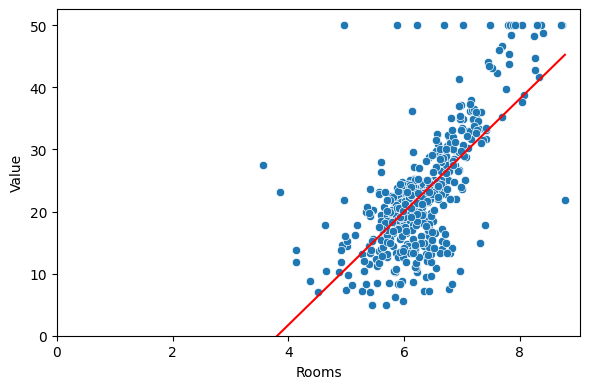

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# plotting the data points
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

#plotting the line
sns.lineplot(x=x['Rooms'],y=y_pred, color='red')

#axes
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()

# Multiple linear regression

In [37]:
# dependent variable
y=df_boston['Value']
# independent variable
x=df_boston[['Rooms','Distance']]

## Making the regression

In [38]:
x= sm.add_constant(x)
lm = sm.OLS(y,x).fit()

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.84e-75
Time:                        17:44:09   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

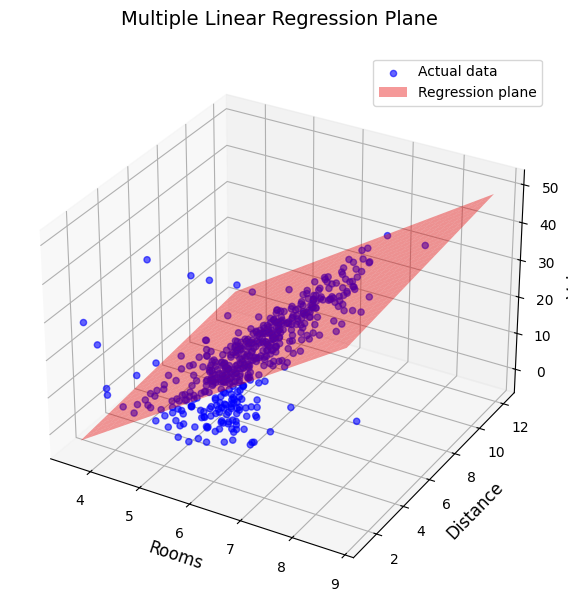

In [43]:

# Import the required libraries
# Axes3D enables 3D plotting in Matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------------
# STEP 1 — Create a 3D figure
#------------------------------------------------------------

# Create a new figure of size 10x7 inches
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot (111 means 1x1 grid, first subplot)
# projection='3d' tells Matplotlib we want a 3D plot
ax = fig.add_subplot(111, projection='3d')

#------------------------------------------------------------
# STEP 2 — Scatter the actual data points
#------------------------------------------------------------

# Plot  real data as blue dots
# x-axis: number of rooms
# y-axis: distance
# z-axis: actual target value (house value)
ax.scatter(
    df_boston['Rooms'],
    df_boston['Distance'],
    df_boston['Value'],
    color='blue',  # blue color for data points
    alpha=0.6,  # slightly transparent for visibility
    label='Actual data'  # label for legend
)

# Each point (Rooms, Distance, Value) shows one data observation

#------------------------------------------------------------
# STEP 3 — Create a grid of (Rooms, Distance) values
#------------------------------------------------------------

# We want to draw the regression plane that covers the full data range.
# So we create a meshgrid — a 2D grid of all possible combinations
# of Rooms and Distance across their observed range.
x_surf, y_surf = np.meshgrid(
    np.linspace(df_boston['Rooms'].min(), df_boston['Rooms'].max(), 30),
    np.linspace(df_boston['Distance'].min(), df_boston['Distance'].max(), 30)
)

# x_surf and y_surf are now 30x30 grids representing Rooms and Distance values.

#------------------------------------------------------------
# STEP 4 — Predict the corresponding z (Value) for each grid point
#------------------------------------------------------------

# Use your fitted linear model (lm) parameters:
# ŷ = const + (Rooms_coef * Rooms) + (Distance_coef * Distance)
z_surf = (
        lm.params['const'] +
        lm.params['Rooms'] * x_surf +
        lm.params['Distance'] * y_surf
)

# This creates a smooth “predicted surface” (the regression plane)
# showing how Value changes as Rooms and Distance vary.

#------------------------------------------------------------
# STEP 5 — Plot the regression plane
#------------------------------------------------------------

# Add the red semi-transparent plane to represent the model’s predictions
ax.plot_surface(
    x_surf, y_surf, z_surf,
    color='red',
    alpha=0.4,  # transparency so data points are still visible
    label='Regression plane'
)

#------------------------------------------------------------
# STEP 6 — Label axes and add a title
#------------------------------------------------------------

ax.set_xlabel('Rooms', fontsize=12)
ax.set_ylabel('Distance', fontsize=12)
ax.set_zlabel('Value', fontsize=12)
ax.set_title('Multiple Linear Regression Plane', fontsize=14, pad=20)

#------------------------------------------------------------
# STEP 7 — Show the legend and plot
#------------------------------------------------------------

# Add a legend for clarity (shows “Actual data”)
plt.legend()

# Finally, render the 3D visualization
plt.show()

# Linear Regression with Scikit-learn

In [44]:
from sklearn import linear_model as lm_sk

In [46]:
y = df_boston['Value'] # dependent variable
X = df_boston[['Rooms', 'Distance']] # independent variable

In [47]:
lm = lm_sk.LinearRegression()
lm.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# Predicting values
lm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

## Regression Table

In [50]:
# r2 score
lm.score(X, y)

np.float64(-34.6360501754733)

In [52]:
# coefficient
lm.coef_

array([8.80141183, 0.48884854])

In [51]:
# intercept
lm.intercept_

np.float64(-34.6360501754733)